In [35]:
import math
import numpy as np
import pandas as pd
import scipy as sc
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [36]:
Z_100Tc=43
A_100Tc=100

Z_127Xe=54
A_127Xe=127

Z_76Ge=32
A_76Ge=76

Привиденная энергия вылетающего электрона: $\epsilon_e = \frac{E_{\nu}-Q_k}{m_e} + 1$

In [37]:
def e_e_func(E_nu, E_k, Q_EC):
    #Считаем привиденную энергию вылетающего электрона. Если энергия налетающего нейтрино E_nu
    #меньше порога, возвращаем 0 для обнуления итогового сечения
    #E_nu in MeV
    q=Q_k_func(E_k, Q_EC) #порог реакции
    if E_nu>q: return 1+(E_nu-q)/0.511
    else: return 0 

Привиденный импульс электрона: $\pi_e=\sqrt{\epsilon_e^2 -1}$

In [38]:
def Pi_e_func(e_e):
    #Привиденный импульс электрона, вычисляется через привиденную энергию; ** означает степень  
    return np.sqrt(e_e**2 - 1)

Ферми функция через гамму: $F(Z_f, E) = 4(2pR_{A})^{2(\gamma_1-1)}\frac{|\Gamma(\gamma_1+iy)|^2}{[\Gamma(2\gamma_1+1)]^2}e^{{\pi}y}$  
$y = \frac{{\alpha}Z_fE}{p}$, $\gamma_1 = \sqrt{1-(Z_f\alpha)^2}$, $R_A = 1.2A^{1/3}$ fm.  
E, p в единицах mc^2 и mc #см. начало Behrens and Janecki

In [39]:
def Fermi_via_Gamma(Z, A, e_e):
    #input энергия электрона в кэв
    alpha = 1/137
    E = E = 1 + e_e/511 #полная энергия электрона в единицах mc^2
    p = Pi_e_func(E)
    y = alpha*Z*E/p
    gamma1 = np.sqrt(1-(Z*alpha)**2)
    R = 1.2*np.cbrt(A)
    
    part1 = 4*(2*p*R)**(2*gamma1-2)
    part2 = np.square(np.abs(sc.special.gamma(gamma1+1j*y)))
    part3 = np.square(sc.special.gamma(2*gamma1+1))
    part4 = np.exp(np.pi*y)
    return part1*(part2/part3)*part4

### Ферми функция из таблиц Суслова. 

In [40]:
Suslov = pd.read_excel('../../fermi_func_tables/Suslov1968.xls', skiprows=6)
Suslov

,"E,mc2",9(20),17(35),29(64),40(91),49(114)
0,1.010,3.512,6.637,13.340,22.990,35.630
1,1.025,2.463,4.311,8.488,14.690,22.690
2,1.050,1.996,3.230,6.129,10.520,16.230
3,1.100,1.702,2.550,4.559,7.667,11.760
4,1.150,1.585,2.279,3.922,6.478,9.841
5,1.250,1.474,2.030,3.337,5.362,8.030
6,1.350,1.422,1.911,3.053,4.811,7.127
7,1.600,1.360,1.775,2.726,4.170,6.046
8,1.850,1.333,1.713,2.576,3.872,5.537
9,2.500,1.303,1.643,2.401,3.512,4.904


In [41]:
def Suslov_func(p_e, Suslov_data, col_name):
    #input энергия электрона в кэв
    W = np.sqrt(p_e**2 + 1)
    return np.interp(x = W, xp = Suslov_data['E,mc2'], 
                     fp = Suslov_data[col_name])

In [42]:
e_e = np.linspace(2,20, 10) #энергия электрона в кэВ

### Buhring 1965

In [43]:
Buhring = pd.read_excel('../../fermi_func_tables/Buhring1965.xls')
Buhring

,p,Ar17(35),Zn30(64),Kr40(90),Kr50(114)
0,0.2,4461,9513,15585,25282
1,0.4,2617,5073,8156,13162
2,0.6,2118,3789,5905,9373
3,0.8,1905,3232,4909,7650
4,1.0,1791,2937,4374,6707
5,1.2,1724,2759,4049,6127
6,1.4,1680,2642,3833,5736
7,1.6,1649,2560,3680,5456
8,1.8,1627,2500,3566,5244
9,2.0,1610,2453,3477,5076


In [44]:
np.sqrt((Suslov['E,mc2'].values)**2 - 1), Suslov['E,mc2'].values, Buhring['p'].values

(array([ 0.14177447,  0.225     ,  0.32015621,  0.45825757,  0.56789083,
         0.75      ,  0.90691786,  1.2489996 ,  1.55643824,  2.29128785,
         2.98705541,  5.15388203,  7.28165503, 11.25566524, 15.21717779,
        19.17394065]),
 array([ 1.01 ,  1.025,  1.05 ,  1.1  ,  1.15 ,  1.25 ,  1.35 ,  1.6  ,
         1.85 ,  2.5  ,  3.15 ,  5.25 ,  7.35 , 11.3  , 15.25 , 19.2  ]),
 array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]))

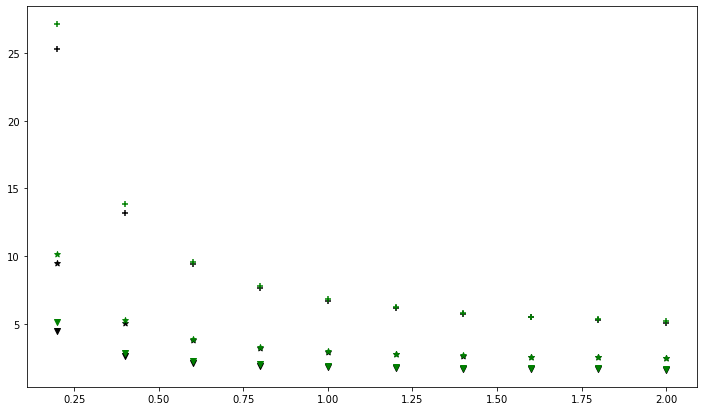

In [45]:
plt.figure(figsize=(12,7))
plt.scatter(Buhring['p'], Buhring['Ar17(35)'] / 1000, marker='v', c='k')
plt.scatter(Buhring['p'], Suslov_func(Buhring['p'], Suslov, '17(35)'), marker='v', c='g')

plt.scatter(Buhring['p'], Buhring['Zn30(64)'] / 1000, marker='*', c='k')
plt.scatter(Buhring['p'], Suslov_func(Buhring['p'], Suslov, '29(64)'), marker='*', c='g')

plt.scatter(Buhring['p'], Buhring['Kr50(114)'] / 1000, marker='+', c='k')
plt.scatter(Buhring['p'], Suslov_func(Buhring['p'], Suslov, '49(114)'), marker='+', c='g')
plt.show()

### Fermi-function from Numerical Tables for Beta-Decay and Electron Capture 
### Z и A даны для дочернего ядра

In [46]:
Janecki = pd.read_excel('../../fermi_func_tables/Janecki-Z=30,50.xls', )
Janecki.head()

,p,Z=30,Z=50
0,0.1,19.5240,55.613
1,0.2,9.8818,28.100
2,0.3,6.7573,19.053
3,0.4,5.2805,14.629
4,0.5,4.4542,12.060


In [47]:
Janecki['Z=50'].values

array([55.613 , 28.1   , 19.053 , 14.629 , 12.06  , 10.417 ,  9.2956,
        8.4923,  7.8947,  7.4361,  6.7839,  6.3455,  6.031 ,  5.7939,
        5.6078,  5.4569,  5.3312,  5.2242,  5.1314,  5.0498,  4.9769,
        4.9113,  4.8515,  4.7967,  4.746 ,  4.6339,  4.5376,  4.453 ,
        4.3773,  4.3087,  4.2458,  4.1877,  4.1336,  4.035 ,  3.9468,
        3.8668,  3.7932,  3.7251,  3.6615,  3.5455,  3.4415,  3.3469,
        3.1415,  2.9687,  2.8195,  2.6885,  2.5721,  2.4679])

In [48]:
def Janecki_func(p, Janecki_data, col_name):
    return np.interp(x = p, xp = Janecki_data['p'], 
                     fp = Janecki_data[col_name])


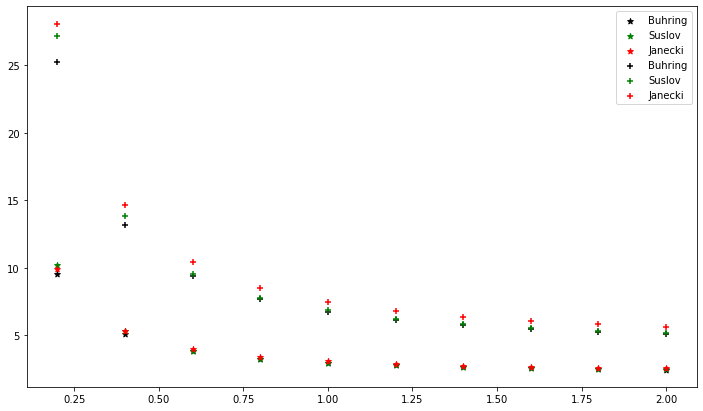

In [49]:
plt.figure(figsize=(12,7))
#plt.scatter(Buhring['p'], Buhring['Ar17(35)'] / 1000, marker='v', c='k')
#plt.scatter(Buhring['p'], Suslov_func(Buhring['p'], Suslov, '17(35)'), marker='+', c='g')

plt.scatter(Buhring['p'], Buhring['Zn30(64)'] / 1000, marker='*', c='k', label='Buhring')
plt.scatter(Buhring['p'], Suslov_func(Buhring['p'], Suslov, '29(64)'), marker='*', c='g', label='Suslov')
plt.scatter(Buhring['p'], Janecki_func(Buhring['p'], Janecki, 'Z=30'), marker='*', c='r', label='Janecki')

plt.scatter(Buhring['p'], Buhring['Kr50(114)'] / 1000, marker='+', c='k', label='Buhring')
plt.scatter(Buhring['p'], Suslov_func(Buhring['p'], Suslov, '49(114)'), marker='+', c='g', label='Suslov')
plt.scatter(Buhring['p'], Janecki_func(Buhring['p'], Janecki, 'Z=50'), marker='+', c='r', label='Janecki')

plt.legend()
plt.show()

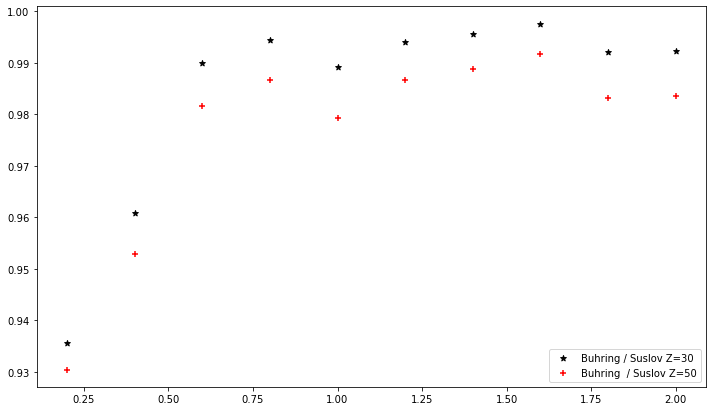

In [50]:
plt.figure(figsize=(12,7))
plt.scatter(Buhring['p'], (Buhring['Zn30(64)'] / 1000) / Suslov_func(Buhring['p'], Suslov, '29(64)'), marker='*', c='k', label='Buhring / Suslov Z=30')
#plt.scatter(Buhring['p'], Janecki_func(Buhring['p'], Janecki, 'Z=30') / Suslov_func(Buhring['p'], Suslov, '29(64)'), marker='*', c='r', label='Janecki  / Suslov Z=30')

plt.scatter(Buhring['p'], (Buhring['Kr50(114)'] / 1000) / Suslov_func(Buhring['p'], Suslov, '49(114)'), marker='+', c='red', label='Buhring  / Suslov Z=50')
#plt.scatter(Buhring['p'], Suslov_func(Buhring['p'], Suslov, '49(114)'), marker='+', c='g', label='Suslov')
#plt.scatter(Buhring['p'], Janecki_func(Buhring['p'], Janecki, 'Z=50'), marker='+', c='r', label='Janecki')

plt.legend(loc='lower right')
plt.show()

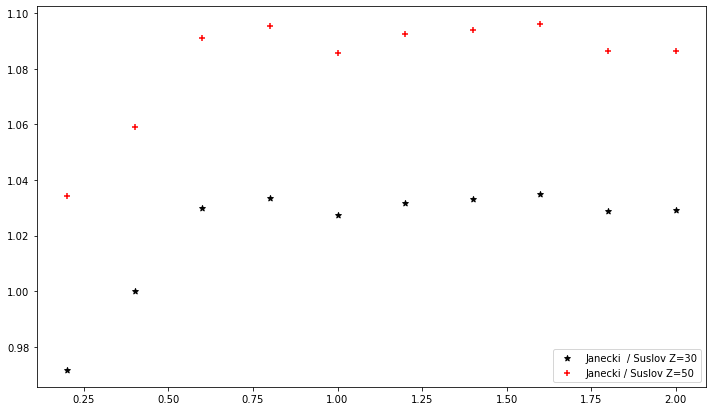

In [51]:
plt.figure(figsize=(12,7))
#plt.scatter(Buhring['p'], (Buhring['Zn30(64)'] / 1000) / Suslov_func(Buhring['p'], Suslov, '29(64)'), marker='*', c='k', label='Buhring / Suslov Z=30')
plt.scatter(Buhring['p'], Janecki_func(Buhring['p'], Janecki, 'Z=30') / Suslov_func(Buhring['p'], Suslov, '29(64)'), marker='*', c='k', label='Janecki  / Suslov Z=30')

plt.scatter(Buhring['p'], Janecki_func(Buhring['p'], Janecki, 'Z=50') / Suslov_func(Buhring['p'], Suslov, '49(114)'), marker='+', c='r', label='Janecki / Suslov Z=50')

plt.legend(loc='lower right')
plt.show()